<a href="https://colab.research.google.com/github/RazvanGolan/Faculty-3rd-year/blob/main/bia/lab6/BIA_Lab_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# $K$-means clustering

We start by generating an unlabeled dataset consisting of five
blobs of instances, using the `make_blobs()` function.

In [ ]:
from sklearn.datasets import make_blobs
import numpy as np
np.random.seed(42)

blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

We can plot the dataset.

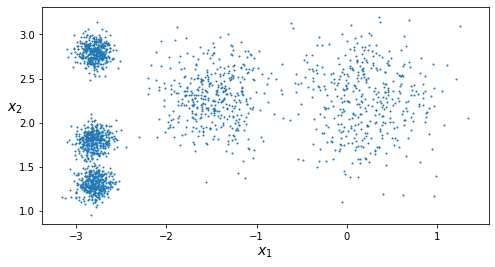

In [ ]:
import matplotlib.pyplot as plt

def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.show()

Let's train a **$K$-means** clusterer on this dataset. It will try to find each blob's center and assign each instance to the closest blob. We use the `KMeans` class, and we need to specify the number of clusters $K$ as the `n_clusters` attribute.

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42)
y_pred = kmeans.fit_predict(X)

Each instance is assigned to one of the 5 clusters.

In [ ]:
y_pred

array([4, 0, 1, ..., 2, 1, 0], dtype=int32)

We can also obtain the clusters by the `labels_` attribute. In this context, the *label* of an instance is the index of the cluster that instance gets assigned to.

In [ ]:
kmeans.labels_

array([4, 0, 1, ..., 2, 1, 0], dtype=int32)

In [ ]:
y_pred is kmeans.labels_

True

The `cluster_centers_` attribute stores the $5$ *centroids* (i.e., cluster centers) obtained by the algorithm.

In [ ]:
kmeans.cluster_centers_

array([[-2.80389616,  1.80117999],
       [ 0.20876306,  2.25551336],
       [-2.79290307,  2.79641063],
       [-1.46679593,  2.28585348],
       [-2.80037642,  1.30082566]])

We can also predict the labels of new instances, by assigning them to the cluster whose centroid is closest.

In [ ]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([1, 1, 2, 2], dtype=int32)

Let's plot the model's *decision boundaries*. This gives us a *Voronoi tessellation*.

In [ ]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=35, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

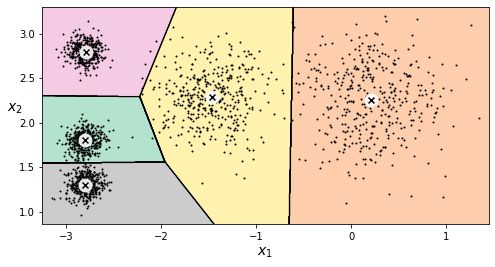

In [ ]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
plt.show()

Some of the instances near the edges were probably assigned to the wrong cluster, but overall the algorithm did a good job.

The `KMeans` class applies an optimized algorithm by default. To get the original $K$-means algorithm (for educational purposes), we must set `init="random"`, `n_init=1`, and `algorithm="full"`. These hyperparameters will be explained below.

Let's run the $K$-means algorithm for 1, 2, and 3 iterations, to see how the centroids move around.

In [ ]:
kmeans_iter1 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=1, random_state=1)
kmeans_iter2 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=2, random_state=1)
kmeans_iter3 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=3, random_state=1)
kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

KMeans(algorithm='full', init='random', max_iter=3, n_clusters=5, n_init=1,
       random_state=1)

And let's plot this.

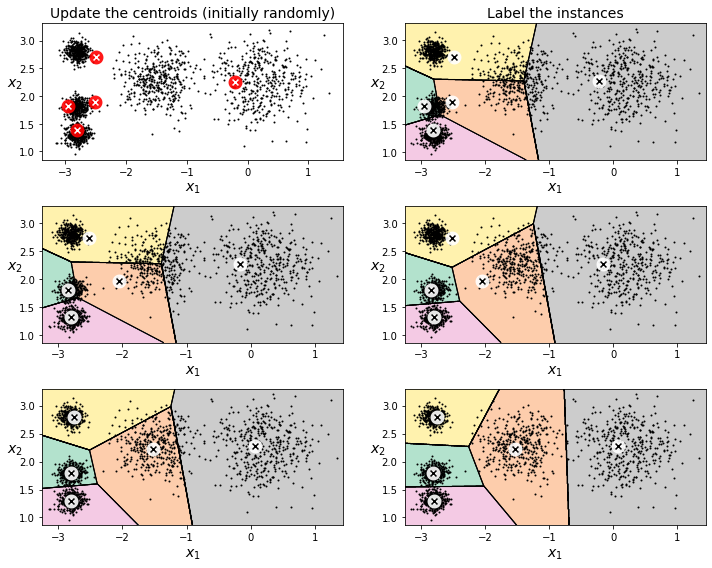

In [ ]:
plt.figure(figsize=(10, 8))

plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.title("Update the centroids (initially randomly)", fontsize=14)

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X)
plt.title("Label the instances", fontsize=14)

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X, show_centroids=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X)

plt.tight_layout()
plt.show()

In the original $K$-means algorithm, the centroids are just initialized randomly, and the algorithm simply runs a single iteration to gradually improve the centroids, as we saw above.

However, one major problem with this approach is that, if we run $K$-means multiple times (or with different random seeds), it can converge to very different solutions, as we can see below.

In [ ]:
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None, title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)

    plt.figure(figsize=(10, 3))

    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1, fontsize=14)

    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X)
    if title2:
        plt.title(title2, fontsize=14)

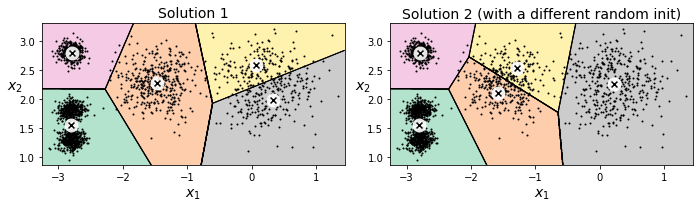

In [ ]:
kmeans_rnd_init1 = KMeans(n_clusters=5, init="random", n_init=1,
                         algorithm="full", random_state=2)
kmeans_rnd_init2 = KMeans(n_clusters=5, init="random", n_init=1,
                         algorithm="full", random_state=4)

plot_clusterer_comparison(kmeans_rnd_init1, kmeans_rnd_init2, X,
                          "Solution 1", "Solution 2 (with a different random init)")

plt.tight_layout()
plt.show()

To select the best model, we will need a way to evaluate a $K$-means model's performance. Unfortunately, clustering is an unsupervised task, so we do not have the targets. But at least we can measure the distance between each instance and its centroid. This is the idea behind the *inertia* metric, accessed through the `inertia_` attribute.

In [ ]:
kmeans.inertia_

211.5985372581684

As we can easily verify, inertia is the sum of the squared distances between each training instance and its closest centroid. In the `KMeans` class, the `transform()` method measures the distance from each instance to every centroid.

In [ ]:
X_dist = kmeans.transform(X)
np.sum(X_dist[np.arange(len(X_dist)), kmeans.labels_]**2)

211.59853725816868

The `score()` method returns the negative inertia. Why negative? Because a predictor's `score()` method must always respect the "*greater is better*" rule: if a predictor is better than another, its `score()` method should return a greater score.

In [ ]:
kmeans.score(X)

-211.59853725816836

So one approach to solve the variability issue is to simply run the $K$-means algorithm multiple times with different random initializations, and select the solution that minimizes the inertia. For example, here are the inertias of the two "bad" models shown in the previous figure.

In [ ]:
kmeans_rnd_init1.inertia_

219.43539442771396

In [ ]:
kmeans_rnd_init2.inertia_

236.96854553302836

As we can see, they have a higher inertia than the first "good" model we trained, which means they are probably worse.

When we set the `n_init` hyperparameter, `scikit-learn` runs the original algorithm `n_init` times, and selects the solution that minimizes the inertia. By default, `scikit-learn` sets `n_init=10`.

In [ ]:
kmeans_rnd_10_inits = KMeans(n_clusters=5, init="random", n_init=10,
                              algorithm="full", random_state=2)
kmeans_rnd_10_inits.fit(X)

KMeans(algorithm='full', init='random', n_clusters=5, random_state=2)

As we can see, we end up with the initial model, which is certainly the optimal $K$-means solution (at least in terms of inertia, and assuming $K=5$).

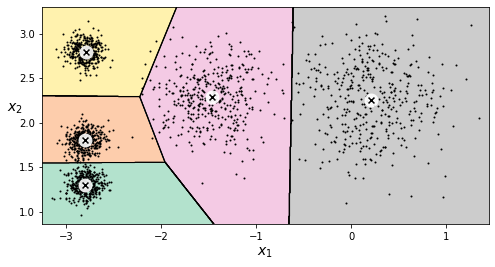

In [ ]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans_rnd_10_inits, X)
plt.show()

If we happen to know approximately where the centroids should be (e.g., if we ran another clustering algorithm earlier), then we can set the `init` hyperparameter to a `numpy` array containing the list of centroids, and set `n_init` to 1.

In [ ]:
good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])
kmeans = KMeans(n_clusters=5, init=good_init, n_init=1, random_state=42)
kmeans.fit(X)
kmeans.inertia_

211.5985372581684

Instead of initializing the centroids entirely randomly, it is preferable to select centroids that are distant from one another, and this improvement makes the $K$-means algorithm much less likely to converge to a suboptimal solution. The additional computation required for the smarter initialization step is well worth it, because it makes it possible to drastically reduce the number of times the algorithm needs to be run to find the optimal solution. The resulting algorithm is called **$K$-means++**.

To set the initialization to $K$-means++, we can simply set `init="k-means++"` (this is actually the default). If we want to force it to use the original method (i.e., picking $K$ instances randomly to define the initial centroids),
then we can set the `init` hyperparameter to `"random"`. However, we will rarely need to do this.

In [ ]:
KMeans(init="k-means++")

KMeans()

Another important improvement to the $K$-means algorithm was proposed by Charles Elkan. It considerably accelerates the algorithm by avoiding many unnecessary distance calculations. Elkan achieved this by exploiting the triangle inequality (i.e., that a straight line is always the shortest distance between two points) and by keeping track of lower and upper bounds for distances between instances and centroids.

To use Elkan's variant of $K$-means, just set `algorithm="elkan"` or `algorithm="auto"` (they are equivalent). This is the algorithm the `KMeans` class uses by default. We can force it to use the original algorithm by setting the algorithm hyperparameter to `"full"`, although we probably will never need to.

In [ ]:
KMeans(algorithm="auto")

KMeans()

Yet another important variant of the $K$-means algorithm was proposed. Instead of using the full dataset at each iteration, the algorithm is capable of using mini-batches, moving the centroids just slightly at each iteration. This speeds up the algorithm, typically by a factor of three or four, and makes it possible to cluster huge datasets that do not fit in memory. `scikit-learn` implements the **mini-batch $K$-means** algorithm in the `MiniBatchKMeans` class. We can just use this class like the `KMeans` class.

In [ ]:
from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(n_clusters=5, random_state=42)
minibatch_kmeans.fit(X)

MiniBatchKMeans(n_clusters=5, random_state=42)

However, its inertia is slightly worse (i.e., higher) than that of the standard $K$-means algorithm.

In [ ]:
minibatch_kmeans.inertia_

211.65239850433215

Although the mini-batch $K$-means algorithm is much faster than the regular `KMeans` algorithm, its inertia is generally slightly worse, especially as the number of clusters increases. We can see this in the figure below: the plot on the left compares the inertias of mini-batch $K$-means and regular $K$-means models trained on the previous dataset, using various numbers of clusters $K$. The difference between the two curves remains fairly constant, but this difference becomes more and more significant as $K$ increases, since the inertia becomes smaller and smaller. In the plot on the right, we can see that mini-batch $K$-means is much faster than regular $K$-means, and this difference
increases with $K$. (Running the below code will take about 5 minutes.)

In [ ]:
from timeit import timeit

times = np.empty((100, 2))
inertias = np.empty((100, 2))
for k in range(1, 101):
    kmeans_ = KMeans(n_clusters=k, random_state=42)
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k, random_state=42)
    times[k-1, 0] = timeit("kmeans_.fit(X)", number=10, globals=globals())
    times[k-1, 1]  = timeit("minibatch_kmeans.fit(X)", number=10, globals=globals())
    inertias[k-1, 0] = kmeans_.inertia_
    inertias[k-1, 1] = minibatch_kmeans.inertia_

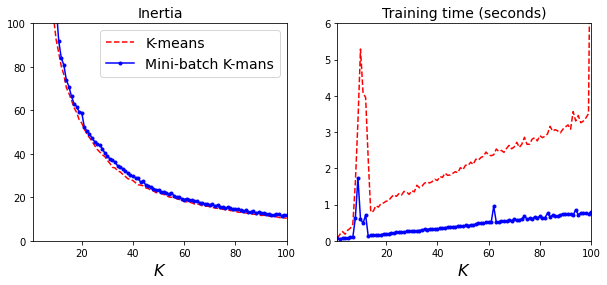

In [ ]:
plt.figure(figsize=(10,4))

plt.subplot(121)
plt.plot(range(1, 101), inertias[:, 0], "r--", label="K-means")
plt.plot(range(1, 101), inertias[:, 1], "b.-", label="Mini-batch K-mans")
plt.xlabel("$K$", fontsize=16)
plt.title("Inertia", fontsize=14)
plt.legend(fontsize=14)
plt.axis([1, 100, 0, 100])

plt.subplot(122)
plt.plot(range(1, 101), times[:, 0], "r--", label="K-means")
plt.plot(range(1, 101), times[:, 1], "b.-", label="Mini-batch K-means")
plt.xlabel("$K$", fontsize=16)
plt.title("Training time (seconds)", fontsize=14)
plt.axis([1, 100, 0, 6])

plt.show()

So far, we have set the number of clusters $K$ to 5, because it was obvious by looking at the data that this was the correct number of clusters. But in general, it will not be so easy to know how to set $K$, and the result might be quite bad if we set it to the wrong value. As we can see in the figure below, setting $K$ to 3 or 8 results in fairly bad models.

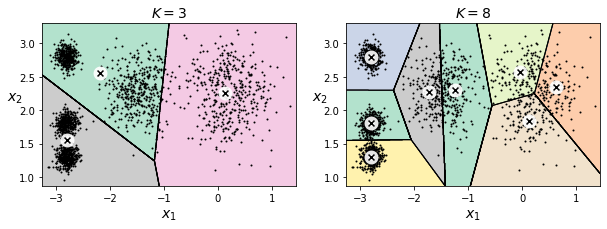

In [ ]:
kmeans_k3 = KMeans(n_clusters=3, random_state=42)
kmeans_k8 = KMeans(n_clusters=8, random_state=42)

plot_clusterer_comparison(kmeans_k3, kmeans_k8, X, "$K=3$", "$K=8$")
plt.show()

We might be thinking that we could just pick the model with the lowest inertia,
right? Unfortunately, it is not that simple. The inertia for $K=3$ is:

In [ ]:
kmeans_k3.inertia_

653.216719002155

This is much higher than for $K=5$, which was $211.6$. But, with $K=8$, the inertia is just:

In [ ]:
kmeans_k8.inertia_

119.11983416102879

The inertia is not a good performance metric when trying to choose $K$, because it keeps getting lower as we increase $K$. Indeed, the more clusters there are, the closer each instance will be to its closest centroid, and therefore the lower the inertia will be. Let’s plot the inertia as a function of $K$.

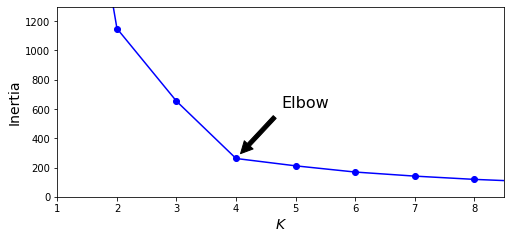

In [ ]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$K$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(4, inertias[3]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.axis([1, 8.5, 0, 1300])
plt.show()

As we can see, the inertia drops very quickly as we increase $K$ up to 4, but then it decreases much more slowly as we keep increasing $K$. This curve has roughly the shape of an arm, and there is an “elbow” at $K = 4$. So, if we did not know better, 4 would be a good choice: any lower value would be dramatic, while any higher value would not help much, and we might just be splitting perfectly good clusters in half for no good reason. Of course, in this example, it is not perfect since it means that the two blobs in the lower left will be considered as just a single cluster, but it's a pretty good clustering, nonetheless.

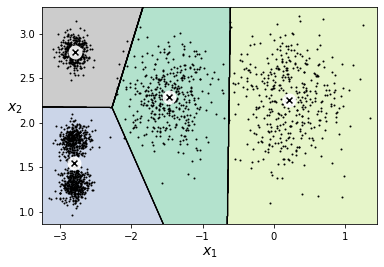

In [ ]:
plot_decision_boundaries(kmeans_per_k[4-1], X)
plt.show()

This technique for choosing the best value for the number of clusters is rather coarse. A more precise approach (but also more computationally expensive) is to use the *silhouette score*, which is the mean *silhouette coefficient* over all the instances. An instance’s silhouette coefficient is equal to $(b – a) / \max(a, b)$, where $a$ is the mean distance to the other instances in the same cluster (i.e., the mean intra-cluster distance) and $b$ is the mean nearest-cluster distance (i.e., the mean distance to the instances of the next closest cluster, defined as the one that minimizes $b$, excluding the instance’s own cluster). The silhouette coefficient can vary between $–1$ and $+1$. A coefficient close to $+1$ means that the instance is well inside its own cluster and far from other clusters, while a coefficient close to $0$ means that it is close to a cluster boundary, and finally a coefficient close to $–1$ means that the instance may have been assigned to the wrong cluster.

To compute the silhouette score, we can use `scikit-learn`’s `silhouette_score()` function, giving it all the instances in the dataset and the labels they were assigned.

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_score(X, kmeans.labels_)

0.655517642572828

Now, let's plot the silhouette score as a function of $K$.

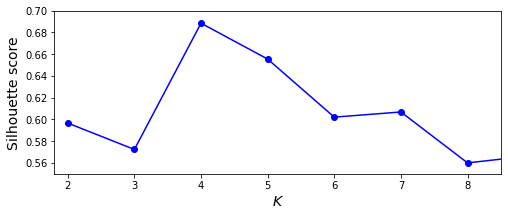

In [ ]:
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$K$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.8, 8.5, 0.55, 0.7])
plt.show()

As we can see, this visualization is much richer than the previous one: although it confirms that $K = 4$ is a very good choice, it also underlines the fact that $K = 5$ is quite good as well, and much better than $K = 6$ or $7$. This was not visible when comparing inertias.

An even more informative visualization is obtained when we plot every instance’s silhouette coefficient, sorted by the cluster they are assigned to and by the value of the coefficient. This is called a *silhouette diagram*. Each diagram contains one knife shape per cluster. The shape’s height indicates the number of instances the cluster contains, and its width represents the sorted silhouette coefficients of the instances in the cluster (wider is better).

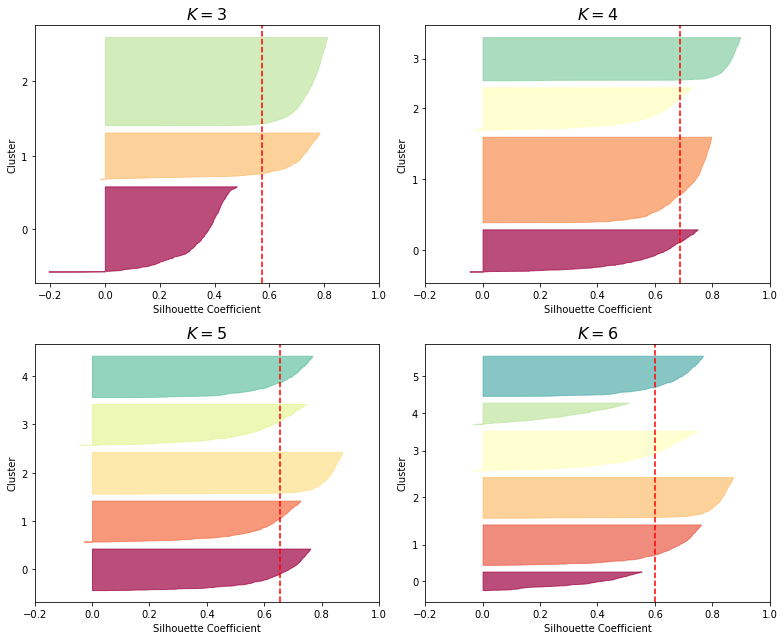

In [ ]:
import matplotlib as mpl
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)

    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))

    plt.gca().set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.xlabel("Silhouette Coefficient")
    plt.ylabel("Cluster")

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$K={}$".format(k), fontsize=16)

plt.tight_layout()
plt.show()

The vertical dashed lines represent the silhouette score for each number of clusters. When most of the instances in a cluster have a lower coefficient than this score (i.e., if many of the instances stop short of the dashed line, ending to the left of it), then the cluster is rather bad, since this means its instances are much too close to other clusters. We can see that when $K = 3$ and when $K = 6$, we get bad clusters. But when $K = 4$ or $K = 5$, the clusters look pretty good: most instances extend beyond the dashed line, to the right and closer to $1.0$. When $K = 4$, the cluster at index $1$ (the third from the top) is rather big. When $K = 5$, all clusters have similar sizes. So, even though the overall silhouette score from $K = 4$ is slightly greater than for $K = 5$, it seems like a good idea to use $K = 5$ to get clusters of similar sizes.

Unfortunately, $K$-means does not behave very well when the clusters have varying sizes, different densities, or nonspherical shapes. Let's consider an example dataset containing three ellipsoidal clusters of different dimensions, densities, and orientations.

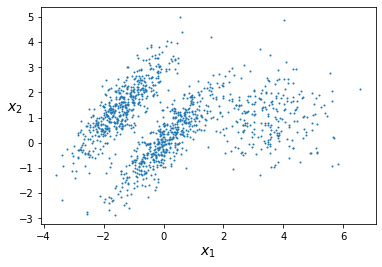

In [ ]:
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

plot_clusters(X)

The figure below shows two examples of how $K$-means clusters this dataset.

In [ ]:
kmeans_good = KMeans(n_clusters=3, init=np.array([[-1.5, 2.5], [0.5, 0], [4, 0]]), n_init=1, random_state=42)
kmeans_bad = KMeans(n_clusters=3, random_state=42)
kmeans_good.fit(X)
kmeans_bad.fit(X)

KMeans(n_clusters=3, random_state=42)

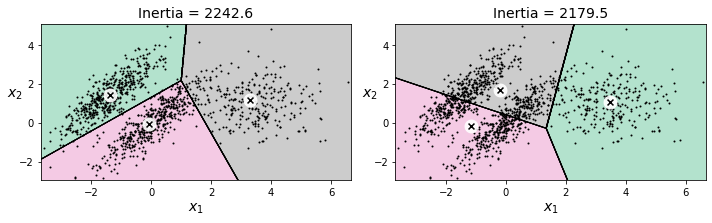

In [ ]:
plt.figure(figsize=(10, 3.2))

plt.subplot(121)
plot_decision_boundaries(kmeans_good, X)
plt.title("Inertia = {:.1f}".format(kmeans_good.inertia_), fontsize=14)

plt.subplot(122)
plot_decision_boundaries(kmeans_bad, X)
plt.title("Inertia = {:.1f}".format(kmeans_bad.inertia_), fontsize=14)

plt.tight_layout()
plt.show()

As we can see, neither of these solutions is any good. The solution on the left is better, but it still chops off $25\%$ of the middle cluster and assigns it to the cluster on the right. The solution on the right is just terrible, even though its inertia is lower.

#Agglomerative clustering

The **agglomerative clustering** algorithm starts by declaring each point its own cluster, and then merges the two most similar clusters, until some stopping criterion is satisfied. The stopping criterion implemented in `scikit-learn`'s `AgglomerativeClustering` class is the number of clusters, so similar clusters are merged, until only the specified number of clusters are left. There are several linkage criteria that specify how exactly the “most similar cluster” is measured. The linkage criterion is specified using the `linkage` parameter.

Because of the way the algorithm works, agglomerative clustering cannot make predictions for new data points. Therefore, `AgglomerativeClustering` has no `predict()` method. To build the model and get the cluster memberships on the training set, we have to use the `fit_predict()` method instead.

We exemplify agglomerative clustering on a very simple two-dimensional dataset, looking for three clusters.

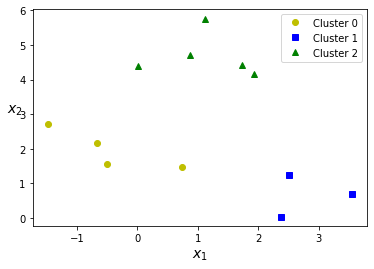

In [ ]:
from sklearn.cluster import AgglomerativeClustering
X, y = make_blobs(random_state=0, n_samples=12)

agg = AgglomerativeClustering(n_clusters=3, linkage="average")
clusters = agg.fit_predict(X)

plt.plot(X[clusters==0, 0], X[clusters==0, 1], "yo")
plt.plot(X[clusters==1, 0], X[clusters==1, 1], "bs")
plt.plot(X[clusters==2, 0], X[clusters==2, 1], "g^")
plt.legend(["Cluster 0", "Cluster 1", "Cluster 2"], loc="best")
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.show()

While the `scikit-learn` implementation of agglomerative clustering requires us to specify the number of clusters we want the algorithm to find, agglomerative clustering methods provide some help with choosing the right number, which we will discuss next.

Agglomerative clustering produces a hierarchical clustering. The clustering proceeds iteratively, and every point makes a journey from being a single point cluster to belonging to some final cluster. Each intermediate step provides a clustering of the data (with a different number of clusters). It is sometimes helpful to look at all possible clusterings jointly. The next example, in the figure below, shows an overlay of all the possible clusterings, providing some insight into how each cluster breaks up into smaller clusters.

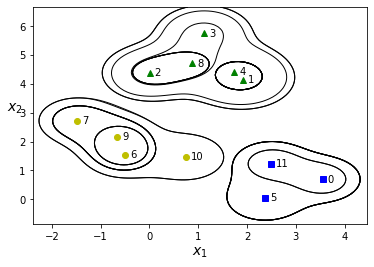

In [ ]:
from sklearn.neighbors import KernelDensity

eps = X.std() / 2.

x_min, x_max = X[:, 0].min() - eps, X[:, 0].max() + eps
y_min, y_max = X[:, 1].min() - eps, X[:, 1].max() + eps

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
gridpoints = np.c_[xx.ravel().reshape(-1, 1), yy.ravel().reshape(-1, 1)]

ax = plt.gca()
for i, x in enumerate(X):
    ax.text(x[0] + .1, x[1], "%d" % i, horizontalalignment='left', verticalalignment='center')

ax.plot(X[clusters==0, 0], X[clusters==0, 1], "yo")
ax.plot(X[clusters==1, 0], X[clusters==1, 1], "bs")
ax.plot(X[clusters==2, 0], X[clusters==2, 1], "g^")

for i in range(11):
    agg.n_clusters = X.shape[0] - i
    agg.fit(X)

    bins = np.bincount(agg.labels_)
    for cluster in range(agg.n_clusters):
        if bins[cluster] > 1:
            points = X[agg.labels_ == cluster]
            other_points = X[agg.labels_ != cluster]

            kde = KernelDensity(bandwidth=.5).fit(points)
            scores = kde.score_samples(gridpoints)
            score_inside = np.min(kde.score_samples(points))
            score_outside = np.max(kde.score_samples(other_points))
            levels = .8 * score_inside + .2 * score_outside
            ax.contour(xx, yy, scores.reshape(100, 100), levels=[levels],
                        colors='k', linestyles='solid', linewidths=1)

plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.show()

While this visualization provides a very detailed view of the hierarchical clustering, it relies on the two-dimensional nature of the data and therefore cannot be used on datasets that have more than two features. There is, however, another tool to visualize hierarchical clustering, the *dendrogram*, that can handle multidimensional datasets.

Unfortunately, `scikit-learn` currently does not have the functionality to draw dendrograms. However, we can generate them easily using `scipy`. The `scipy` clustering algorithms have a slightly different interface to the `scikit-learn` clustering algorithms. `scipy` provides a function that takes a data array `X` and computes a *linkage array*, which encodes hierarchical cluster similarities. We can then feed this linkage array into the `scipy` `dendrogram()` function to plot the dendrogram.

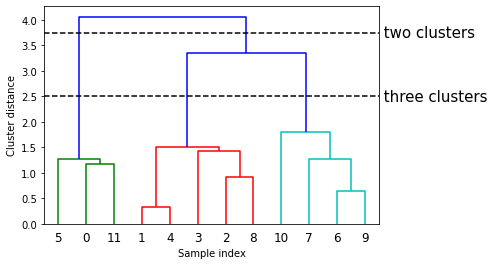

In [ ]:
# Import the dendrogram function and the average clustering function from scipy
from scipy.cluster.hierarchy import dendrogram, average

X, y = make_blobs(random_state=0, n_samples=12)
# Apply the average clustering to the data array X
# The scipy average function returns an array that specifies the distances
# bridged when performing agglomerative clustering
linkage_array = average(X)
# Now we plot the dendrogram for the linkage_array containing the distances
# between clusters
dendrogram(linkage_array)

# mark the cuts in the tree that signify two or three clusters
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [3.75, 3.75], '--', c='k')
ax.plot(bounds, [2.5, 2.5], '--', c='k')

ax.text(bounds[1], 3.75, ' two clusters', va='center', fontdict={'size': 15})
ax.text(bounds[1], 2.5, ' three clusters', va='center', fontdict={'size': 15})
plt.xlabel("Sample index")
plt.ylabel("Cluster distance")
plt.show()

The dendrogram shows data points as points on the bottom (numbered from 0 to
11). Then, a tree is plotted with these points (representing single-point clusters) as the leaves, and a new node parent is added for each two clusters that are joined.

Reading from bottom to top, the data points 1 and 4 are joined first. Next, points 6 and 9 are joined into a cluster, and so on. At the top level, there are two branches, one consisting of points 11, 0, 5, 10, 7, 6, and 9, and the other consisting of points 1, 4, 3, 2, and 8. These correspond to the two largest clusters in the left side of the plot.

The y-axis in the dendrogram doesn’t just specify when in the agglomerative algorithm two clusters get merged. The length of each branch also shows how far apart the merged clusters are. The longest branches in this dendrogram are the three lines that are marked by the dashed line labeled “three clusters”. That these are the longest branches indicates that going from three to two clusters meant merging some very far-apart points. We see this again at the top of the chart, where merging the two remaining clusters into a single cluster again bridges a relatively large distance.

#DBSCAN

The **DBSCAN** algorithm (which stands for “density-based spatial clustering of applications with noise”) defines clusters as continuous regions of high density. This algorithm works well if all the clusters are dense enough and if they are well separated by low-density regions. The `DBSCAN` class in `scikit-learn` implements this algorithm. Let’s test it on the `two_moons` dataset.

In [ ]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)

In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.05)

The labels of all the instances are now available in the `labels_` attribute.

In [ ]:
dbscan.labels_[:10]

array([ 0,  2, -1, -1,  1,  0,  0,  0,  2,  5])

Notice that some instances have a cluster index equal to $–1$, which means that they are considered as noise by the algorithm. The indices of the core samples are available in the `core_sample_indices_` attribute, and the core samples themselves are available in the `components_` attribute.

In [ ]:
len(dbscan.core_sample_indices_)

808

In [ ]:
dbscan.core_sample_indices_[:10]

array([ 0,  4,  5,  6,  7,  8, 10, 11, 12, 13])

In [ ]:
dbscan.components_

array([[-0.02137124,  0.40618608],
       [-0.84192557,  0.53058695],
       [ 0.58930337, -0.32137599],
       ...,
       [ 1.66258462, -0.3079193 ],
       [-0.94355873,  0.3278936 ],
       [ 0.79419406,  0.60777171]])

This clustering is represented in the left plot of the figure below. As we can see, it identified quite a lot of noise points, plus seven different clusters. Fortunately, if we widen each instance’s neighborhood by increasing `eps` to $0.2$, we get the clustering on the right, which looks perfect.

In [ ]:
np.unique(dbscan.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6])

In [ ]:
dbscan2 = DBSCAN(eps=0.2)
dbscan2.fit(X)

DBSCAN(eps=0.2)

In [ ]:
def plot_dbscan(dbscan, X, size):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    noise_mask = (dbscan.labels_ == -1)
    non_core_mask = ~(core_mask | noise_mask)

    cores = dbscan.components_
    noise = X[noise_mask]
    non_cores = X[non_core_mask]

    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(noise[:, 0], noise[:, 1], c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)

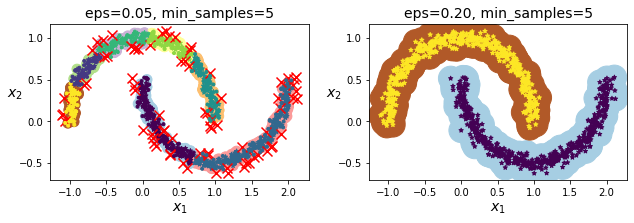

In [ ]:
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_dbscan(dbscan, X, size=100)

plt.subplot(122)
plot_dbscan(dbscan2, X, size=600)

plt.tight_layout()
plt.show()

#Evaluating clustering methods

One of the challenges in applying clustering algorithms is that it is very hard to assess how well an algorithm worked, and to compare outcomes between different algorithms.

There are metrics that can be used to assess the outcome of a clustering algorithm relative to a ground truth clustering, the most important ones being the *adjusted rand index* (*ARI*) and *normalized mutual information* (*NMI*), which both provide a quantitative measure between $0$ and $1$.

First, we compare the $K$-means, agglomerative clustering, and DBSCAN algorithms
using ARI on the `two_moons` dataset. It is implemented by the `adjusted_rand_score()` function in `scikit-learn`.

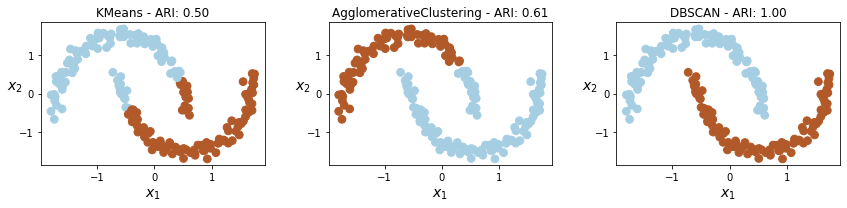

In [ ]:
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.preprocessing import StandardScaler

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# Rescale the data to zero mean and unit variance
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

fig, axes = plt.subplots(1, 3, figsize=(12, 3))

# make a list of algorithms to use
algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2),
              DBSCAN()]

for ax, algorithm in zip(axes, algorithms):
    # plot the cluster assignments and cluster centers
    clusters = algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters,
               cmap="Paired", s=60)
    ax.set_title("{} - ARI: {:.2f}".format(algorithm.__class__.__name__,
                                           adjusted_rand_score(y, clusters)))
    ax.set_xlabel("$x_1$", fontsize=14)
    ax.set_ylabel("$x_2$", fontsize=14, rotation=0)

plt.tight_layout()
plt.show()

The adjusted rand index provides intuitive results, with DBSCAN (which recovers the desired clustering perfectly) having a score of $1$.

Next, we compare the  $K$-means, agglomerative clustering, and DBSCAN algorithms using NMI. It is implemented by the `normalized_mutual_info_score()` function in `scikit-learn`.

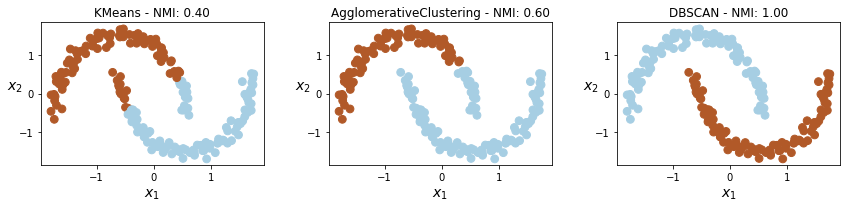

In [ ]:
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.preprocessing import StandardScaler

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# Rescale the data to zero mean and unit variance
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

fig, axes = plt.subplots(1, 3, figsize=(12, 3))

# make a list of algorithms to use
algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2),
              DBSCAN()]

for ax, algorithm in zip(axes, algorithms):
    # plot the cluster assignments and cluster centers
    clusters = algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters,
               cmap="Paired", s=60)
    ax.set_title("{} - NMI: {:.2f}".format(algorithm.__class__.__name__,
                                           normalized_mutual_info_score(y, clusters)))
    ax.set_xlabel("$x_1$", fontsize=14)
    ax.set_ylabel("$x_2$", fontsize=14, rotation=0)

plt.tight_layout()
plt.show()

The NMI score also assigns a perfect score of $1$ to the DBSCAN algorithm.

However, in practice, when applying clustering algorithms, there is usually no ground truth with which to compare the results. If we knew the right clustering of the data, we could use this information to build a supervised model like a classifier. Therefore, using metrics like ARI and NMI usually only helps in developing algorithms, not in assessing success in an application.

The *silhouette score* is a scoring metric for clustering that doesn’t require ground truth. Unfortunately, this metric often doesn’t work well in practice. The silhouette score computes the compactness of a cluster, where higher is better, with a perfect score of $1$. While compact clusters are good, compactness doesn’t allow for complex shapes.

Here is an example comparing the outcome of $K$-means, agglomerative clustering,
and DBSCAN on the `two_moons` dataset, using the silhouette score.

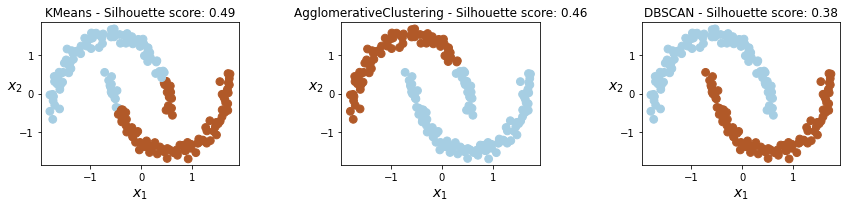

In [ ]:
from sklearn.metrics.cluster import silhouette_score
from sklearn.preprocessing import StandardScaler

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# Rescale the data to zero mean and unit variance
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

fig, axes = plt.subplots(1, 3, figsize=(12, 3))

# make a list of algorithms to use
algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2),
              DBSCAN()]

for ax, algorithm in zip(axes, algorithms):
    # plot the cluster assignments and cluster centers
    clusters = algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters,
               cmap="Paired", s=60)
    ax.set_title("{} - Silhouette score: {:.2f}".format(algorithm.__class__.__name__,
                                           silhouette_score(X_scaled, clusters)))
    ax.set_xlabel("$x_1$", fontsize=14)
    ax.set_ylabel("$x_2$", fontsize=14, rotation=0)

plt.tight_layout()
plt.show()

As we can see, $K$-means gets the highest silhouette score, even though we might prefer the result produced by DBSCAN.